<a href="https://colab.research.google.com/github/nbsreenivas/day30-27-06-30-/blob/master/27_06_30_(day_30_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
## drop the CASENUM :
# droping the casenum column


In [5]:
data.drop(['CASENUM'],axis = 1 , inplace =True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [6]:
## checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
# checking the missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

### imputing the missing values:

In [10]:
##creating a user-defined function for imputng the missing values 
# with mode  (numerical & categorical data )
## lambda --> lambda arguments : expressions
def fill_na(col):
  col.fillna(col.value_counts().index[0], inplace = True)
  return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

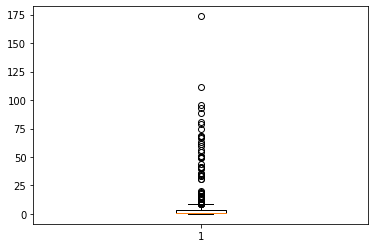

In [13]:
# loss column              ## Datapoint <Q
plt.boxplot(data.LOSS)
plt.show()

In [ ]:
--> data entry mistake


1. outliers also missing data --> imputation
2.  winsorization --> outliers re replaced with small value
ex: 

In [14]:
## split the data into input and output
X = data.iloc[:,1:]
y = data.ATTORNEY

In [15]:
# split the data into training and testing
# build the model on training data and check the model performance
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [16]:
## build the classifier on the training data
# sklearn library : import , instantiate ,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train) # input and out put will be passed to the fit method


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# predicitng on train data
# syntex : object name .predict(input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [19]:
# confusion matrix for training data
# confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train, y_train_pred)
conf


array([[315, 170],
       [108, 345]])

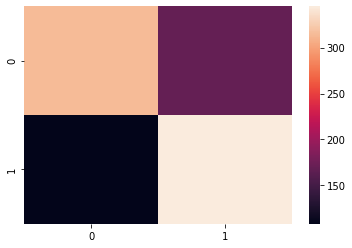

In [20]:
sns.heatmap(conf)

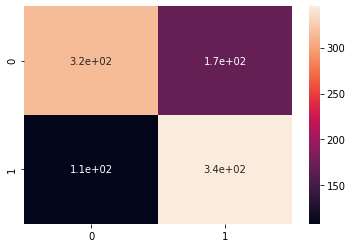

In [22]:
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot= True)

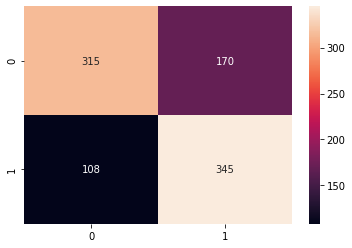

In [23]:
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot= True,fmt = '3.0f')

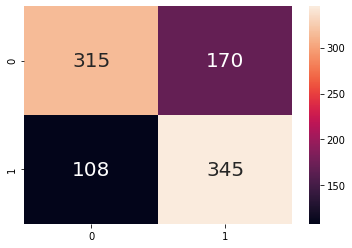

In [24]:
sns.heatmap(confusion_matrix(y_train, y_train_pred),annot= True,fmt = '3.0f',annot_kws = {'size': '20'})

In [32]:
conf

array([[315, 170],
       [108, 345]])

In [33]:
conf[0][0]
conf[0][1]

170

In [37]:
print('True_positives ', conf[0][0])
print('false_positives ',conf[0][1])
print('false_negatives ',conf[1][0])
print('True_negatives ',conf[1][1])
True_positive = conf[0][0]
false_negative = conf[1][1]

True_positives  315
false_positives  170
false_negatives  108
True_negatives  345


In [25]:
## accuracy --> Tp+TN /TP+FP+TN+FN
(315+345)/(315+70+108+345)

0.7875894988066826

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.7036247334754797

In [38]:
## precision rate
Recall = True_positive/(True_positive+false_negative)
Recall

0.4772727272727273

In [39]:
# precision :
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593